In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [64]:
MaxAnglePerTrial = pd.read_csv(r'MaxAnglePerTrial.csv')
VelocityPerTrial = pd.read_csv(r'VelocityPerTrial.csv')
MinAngleRegionTwo = pd.read_csv(r'MinAngleRegionTwo.csv')
TimeDifferences = pd.read_csv(r'TimeDifferenceregionOneAndTwotoBasePlane_V2.csv')
TotalDistances = pd.read_csv(r'TotalDistanceCovered.csv')
VelocityYValues = pd.read_csv(r'VelocityYPerTrial.csv')

In [65]:
combinedAlgorithmData = pd.DataFrame()

In [66]:
combinedAlgorithmData['Trial'] = MaxAnglePerTrial.Trial
combinedAlgorithmData['BPM'] = MaxAnglePerTrial.BPM
combinedAlgorithmData['GestureSize'] = MaxAnglePerTrial.GestureSize

combinedAlgorithmData['MedianVelocityRegionOne'] = VelocityPerTrial.MedianVelocityRegionOne
combinedAlgorithmData['MedianVelocityRegionTwo'] = VelocityPerTrial.MedianVelocityRegionTwo
combinedAlgorithmData['MeanVelocityRegionOne'] = VelocityPerTrial.MeanVelocityRegionTwo
combinedAlgorithmData['MeanVelocityRegionTwo'] = VelocityPerTrial.MeanVelocityRegionTwo

combinedAlgorithmData['RegionOneDistance'] = TotalDistances.TotalDistanceCoveredInRegionOne
combinedAlgorithmData['RegionTwoDistance'] = TotalDistances.TotalDistanceCoveredInRegionTwo
combinedAlgorithmData['TotalRegionDistance'] = TotalDistances.TotalDistanceCoveredBothRegions

combinedAlgorithmData['MaxAngleRegionOne'] = MaxAnglePerTrial.MaxAngleRegionOne
combinedAlgorithmData['MaxAngleRegionTwo'] = MaxAnglePerTrial.MaxAngleRegionTwo

combinedAlgorithmData['MinAngleRegionTwo'] = MinAngleRegionTwo.MinAngleRegionTwo

combinedAlgorithmData['MedianVelocityYRegionOne'] = VelocityYValues.MedianVelocityYRegionOne
combinedAlgorithmData['MedianVelocityYRegionTwo'] = VelocityYValues.MedianVelocityYRegionTwo
combinedAlgorithmData['MeanVelocityYRegionOne'] = VelocityYValues.MeanVelocityYRegionOne
combinedAlgorithmData['MeanVelocityYRegionTwo'] = VelocityYValues.MeanVelocityYRegionTwo

#combinedAlgorithmData['TimeDiffRegionOneToPlane'] = TimeDifferences.TimeDiffRegionOneToPlane
#combinedAlgorithmData['TimeDiffRegionTwoToPlane'] = TimeDifferences.TimeDiffRegionTwoToPlane
combinedAlgorithmData['TimeEndRegionOne'] = TimeDifferences.TimeEndRegionOne
combinedAlgorithmData['TimeEndRegionTwo'] = TimeDifferences.TimeEndRegionTwo
combinedAlgorithmData['TimeStartRegionOne'] = TimeDifferences.TimeStartRegionOne
combinedAlgorithmData['TimeStartRegionTwo'] = TimeDifferences.TimeStartRegionTwo
combinedAlgorithmData['TimeDifferenceBetweenCollisions'] = TimeDifferences.TimeDifferenceBetweenCollisions

combinedAlgorithmData['BPM'] = MaxAnglePerTrial.BPM


In [67]:
X = combinedAlgorithmData.iloc[:,3:19]
y = combinedAlgorithmData.iloc[:,-1]

In [68]:
combinedAlgorithmData['TimeEndRegionOne']

0      0.46
1      0.46
2      0.52
3      0.56
4      0.58
5      0.54
6      0.48
7      0.44
8      0.54
9      0.54
10     0.50
11     0.50
12     0.60
13     0.48
14     0.52
15     0.62
16     0.50
17     0.48
18     0.40
19     0.46
20     0.44
21     0.46
22     0.44
23     0.50
24     0.46
25     0.40
26     0.46
27     0.44
28     0.38
29     0.46
       ... 
328    0.38
329    0.48
330    0.46
331    0.38
332    0.40
333    0.36
334    0.38
335    0.38
336    0.36
337    0.38
338    0.42
339    0.40
340    0.36
341    0.34
342    0.36
343    0.38
344    0.38
345    0.26
346    0.40
347    0.34
348    0.30
349    0.38
350    0.30
351    0.30
352    0.30
353    0.40
354    0.30
355    0.30
356    0.30
357    0.32
Name: TimeEndRegionOne, Length: 358, dtype: float64

In [69]:
combinedAlgorithmData['TimeStartRegionOne']

0      0.12
1      0.12
2      0.16
3      0.24
4      0.24
5      0.16
6      0.18
7      0.16
8      0.26
9      0.20
10     0.16
11     0.22
12     0.20
13     0.14
14     0.22
15     0.24
16     0.16
17     0.12
18     0.06
19     0.12
20     0.18
21     0.18
22     0.16
23     0.16
24     0.16
25     0.14
26     0.16
27     0.18
28     0.12
29     0.18
       ... 
328    0.12
329    0.20
330    0.18
331    0.18
332    0.12
333    0.12
334    0.12
335    0.14
336    0.16
337    0.10
338    0.16
339    0.12
340    0.12
341    0.14
342    0.12
343    0.12
344    0.14
345    0.08
346    0.14
347    0.14
348    0.12
349    0.12
350    0.12
351    0.12
352    0.12
353    0.12
354    0.12
355    0.04
356    0.12
357    0.08
Name: TimeStartRegionOne, Length: 358, dtype: float64

In [70]:
combinedAlgorithmData['TimeEndRegionOne'] = combinedAlgorithmData['TimeEndRegionOne'] -combinedAlgorithmData['TimeStartRegionOne']
combinedAlgorithmData['TimeStartRegionTwo'] = combinedAlgorithmData['TimeStartRegionTwo'] -combinedAlgorithmData['TimeStartRegionOne']
combinedAlgorithmData['TimeEndRegionTwo'] = combinedAlgorithmData['TimeEndRegionTwo'] -combinedAlgorithmData['TimeStartRegionOne']
combinedAlgorithmData = combinedAlgorithmData.drop(columns=['TimeStartRegionOne'],axis=1)
combinedAlgorithmData = combinedAlgorithmData.loc[combinedAlgorithmData.TimeDifferenceBetweenCollisions != 0]
combinedAlgorithmData

Trial    BPM GestureSize  MedianVelocityRegionOne  \
0      1.0   80.0           S                 1.080500   
1      2.0   80.0           S                 0.959128   
2      3.0   80.0           S                 1.077521   
3      4.0   80.0           S                 1.140583   
4      5.0   80.0           S                 1.131928   
5      6.0   80.0           S                 1.054572   
6      7.0   80.0           S                 1.065533   
7      8.0   80.0           S                 1.142082   
8      9.0   80.0           S                 1.281573   
9     10.0   80.0           S                 1.253284   
10    11.0   80.0           S                 1.204255   
11    12.0   80.0           S                 1.139921   
12    13.0   80.0           S                 0.994952   
13    14.0   80.0           S                 0.866635   
14    15.0   80.0           S                 1.061329   
15    16.0   80.0           S                 1.031303   
16    17.0   80.0           S                 0.921556   
17    18.0   80.0           S                 0.995851   
18    19.0   80.0           S                 0.950129   
19    20.0   80.0           S                 0.952062   
20    21.0   80.0           S                 0.977266   
21    22.0   80.0           S                 1.002295   
22    23.0   80.0           S                 1.003470   
23    24.0   80.0           S                 0.966660   
24    25.0   80.0           S                 0.986424   
25    26.0   80.0           S                 0.924006   
26    27.0   80.0           S                 1.131369   
27    28.0   80.0           S                 0.917979   
28    29.0   80.0           S                 0.732626   
29    30.0   80.0           S                 0.836195   
..     ...    ...         ...                      ...   
328   11.0  120.0           L                 2.020251   
329   12.0  120.0           L                 2.496389   
330   13.0  120.0           L                 2.335086   
331   14.0  120.0           L                 2.428925   
332   15.0  120.0           L                 2.461280   
333   16.0  120.0           L                 2.083776   
334   17.0  120.0           L                 2.379578   
335   18.0  120.0           L                 2.260694   
336   19.0  120.0           L                 2.332221   
337   20.0  120.0           L                 2.400057   
338   21.0  120.0           L                 1.666707   
339   22.0  120.0           L                 1.522026   
340   23.0  120.0           L                 1.881044   
341   24.0  120.0           L                 2.021903   
342   25.0  120.0           L                 1.786768   
343   26.0  120.0           L                 1.752940   
344   27.0  120.0           L                 1.694449   
345   28.0  120.0           L                 2.037897   
346   29.0  120.0           L                 1.838410   
347   30.0  120.0           L                 1.932130   
348   31.0  120.0           L                 2.009338   
349   32.0  120.0           L                 1.741141   
350   33.0  120.0           L                 1.974365   
351   34.0  120.0           L                 2.204129   
352   35.0  120.0           L                 2.304562   
353   36.0  120.0           L                 1.750795   
354   37.0  120.0           L                 1.814318   
355   38.0  120.0           L                 1.640286   
356   39.0  120.0           L                 1.812362   
357   40.0  120.0           L                 1.800795   

     MedianVelocityRegionTwo  MeanVelocityRegionOne  MeanVelocityRegionTwo  \
0                   0.607110               0.577710               0.577710   
1                   0.566222               0.493063               0.493063   
2                   0.653276               0.576459               0.576459   
3                   0.509770               0.563331               0.563331   
4                 

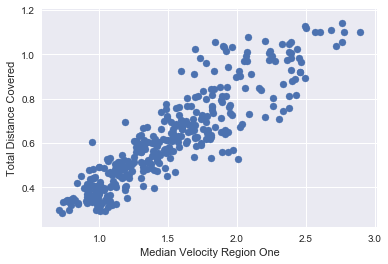

In [71]:
plt.xlabel('Median Velocity Region One');
plt.ylabel('Total Distance Covered')
plt.scatter(combinedAlgorithmData.MedianVelocityRegionOne,combinedAlgorithmData.TotalRegionDistance)
#plt.xlabel('Distance');
#plt.ylabel('Time')
#plt.scatter(combinedAlgorithmData.TotalRegionDistance,y)

In [72]:
combinedAlgorithmData.to_csv(r'CombinedAlgorithmDataV2.csv')